In [4]:
import sys
sys.path.append("f:/copy_20210407/projects/kiss1/src/")

import pandas as pd
import os
import DyMat
import kissmodelica.postproc as pp

import plotly.express as px

In [5]:
df_in = pd.read_csv("200_samples_Vdot_variable.csv")

In [16]:
resdir = "f:/copy_20210407/projects/kiss_work"

# this takes a while ...
if 1==0:
    data = []
    for r in df_in.to_dict(orient='records'):
        simid = r["simid"]
        mat_path = os.path.join(resdir, simid+"_res.mat")
        mat = DyMat.DyMatFile(mat_path)
        try:
            res = pp.extract_scalar_values2(mat, **r)
        except ValueError:
            res = {"simid": simid}
        data.append(res)
        
    df_res = pd.DataFrame(data)
    # save as csv
    df_res.to_csv("200_samples_Vdot_variable_results.csv", index=False)
    
# read csv
df_res = pd.read_csv("200_samples_Vdot_variable_results.csv")
# merge with input
dfr = pd.merge(df_in, df_res, on="simid")

* m_flow: per rack
* V_dot
* Pmax
* Qgen
* mass_estimate: per pack

In [17]:
MCELL = 0.137 # kg

# Per pack data

# warum 4? -> 4 kanäle.
# mass estimate for a plate: 4 * ncells * cell_width x ((2*t_cover + channel_height) x channel_dist - channel_height x channel_width)
dfr['mass_estimate_pack'] = dfr.nracks*dfr.ncells * (4*dfr.rho_plate*dfr.cell_width*((2*dfr.t_cover + dfr.channel_height)*dfr.channel_dist - 
                                                   dfr.channel_height * dfr.channel_width) + 2*MCELL)
dfr["m_flow_pack"] = dfr["m_flow"] * dfr["nracks"]
dfr["ar_channel"] = dfr["channel_width"] / dfr["channel_height"]
dfr["ncells_pack"] = 2 * dfr["ncells"] * dfr["nracks"]



In [18]:
dfr.describe().T

count           mean           std           min  \
t_cover             196.0       0.001199  4.180864e-04  5.082181e-04   
channel_width       196.0       0.012184  4.309453e-03  4.191595e-03   
channel_height      196.0       0.003203  1.611862e-03  5.419439e-04   
nracks              196.0      10.816327  8.320931e+00  2.000000e+00   
ncells              196.0      11.193878  8.463688e+00  2.000000e+00   
C_quartercell       196.0      36.300000  1.424725e-14  3.630000e+01   
k_cell              196.0       3.311000  4.452264e-16  3.311000e+00   
c_cover             196.0     888.000000  0.000000e+00  8.880000e+02   
k_cover             196.0     220.000000  0.000000e+00  2.200000e+02   
rho_cover           196.0    2700.000000  0.000000e+00  2.700000e+03   
c_plate             196.0     888.000000  0.000000e+00  8.880000e+02   
k_plate             196.0     220.000000  0.000000e+00  2.200000e+02   
rho_plate           196.0    2700.000000  0.000000e+00  2.700000e+03   
channel_dist        196.0       0.040000  6.956663e-18  4.000000e-02   
cell_width          196.0       0.043000  0.000000e+00  4.300000e-02   
stoptime            196.0    2000.000000  0.000000e+00  2.000000e+03   
m_flow              196.0       0.026437  2.729330e-02  3.241160e-04   
area_cover          196.0       0.000524  1.853065e-04  1.802386e-04   
t_plate             196.0       0.027816  4.309453e-03  2.100302e-02   
area_plate          196.0       0.000138  6.931007e-05  2.330359e-05   
area_channel        196.0       0.000039  2.480986e-05  3.553016e-06   
perim_channel       196.0       0.030772  9.300659e-03  1.075234e-02   
tend                169.0    2000.000000  0.000000e+00  2.000000e+03   
T_inflow            169.0     293.150000  1.140247e-13  2.931500e+02   
Vdot                169.0       0.000027  2.811294e-05  3.787427e-07   
v                   169.0       1.382697  2.204008e+00  8.338656e-03   
dp_max              169.0  199513.486118  8.569802e+05  6.291622e+00   
Pmax                169.0      13.206098  6.527862e+01  3.630440e-06   
Qgen                169.0  154077.133886  1.163666e+05  2.646243e+04   
T_cellmax           169.0     311.875734  6.923825e+00  3.038331e+02   
t21                 161.0     331.341615  2.663326e+02  1.520000e+02   
tpeak               169.0      95.106509  3.391762e+01  9.000000e+01   
T_cell1000          169.0     293.814701  2.963288e+00  2.931500e+02   
dhyd                169.0       0.009389  4.264459e-03  2.076677e-03   
Re                  169.0    8366.393654  9.820994e+03  8.076537e+01   
mass_estimate_pack  196.0      25.604278  1.876798e+00  2.108953e+01   
m_flow_pack         196.0       0.165148  9.681794e-02  4.611921e-03   
ar_channel          196.0       5.670373  5.232566e+00  1.036314e+00   
ncells_pack         196.0     142.326531  1.978217e+00  1.400000e+02   

                             25%            50%            75%           max  
t_cover                 0.000832       0.001151       0.001557  1.990918e-03  
channel_width           0.008513       0.012807       0.015888  1.899698e-02  
channel_height          0.001839       0.003187       0.004529  5.968437e-03  
nracks                  5.000000       8.000000      14.000000  3.500000e+01  
ncells                  5.000000       9.000000      14.000000  3.500000e+01  
C_quartercell          36.300000      36.300000      36.300000  3.630000e+01  
k_cell                  3.311000       3.311000       3.311000  3.311000e+00  
c_cover               888.000000     888.000000     888.000000  8.880000e+02  
k_cover               220.000000     220.000000     220.000000  2.200000e+02  
rho_cover            2700.000000    2700.000000    2700.000000  2.700000e+03  
c_plate               888.000000     888.000000     888.000000  8.880000e+02  
k_plate               220.000000     220.000000     220.000000  2.200000e+02  
rho_plate            2700.000000    2700.000000    2700.000000  2.700000e+03  
channel_dist            0.040000 

In [ ]:
# input columns

In [34]:
cols = ['t_cover', 'channel_width', 'channel_height', 'nracks', 'ncells',
        'm_flow', 't_plate', 
       'simid', "satisfactory", "m_flow_pack",
       'dp_max', 'T_cellmax', 't21', 'tpeak',
       'T_cell1000', 'dhyd', 'Re', 'mass_estimate_pack']

# constraints: dp < .1 bar, t21 < 1000, Tmax < 45
dfr["satisfactory"] = (dfr.t21 <= 1000) & (dfr.dp_max <= 1e4) & (dfr.T_cellmax <= 273.15 + 45)

fig = px.scatter(dfr, x="mass_estimate_pack", y="dp_max", color='satisfactory', log_y=True,
                 color_discrete_sequence=["red", "green"],
                 hover_data={c:True for c in cols})
fig.show()

## Qualitative Auswertung

- channel_height and dhyd correlate strongly
- m_flow_pack and T_cellmax correlate strongly
- Re and dpmax and Tcell1000 have very skewed distributions, cannt say anything about them
- t21 and mflow_pack correlate
- t21 appears as a bimodal distribution -> why?

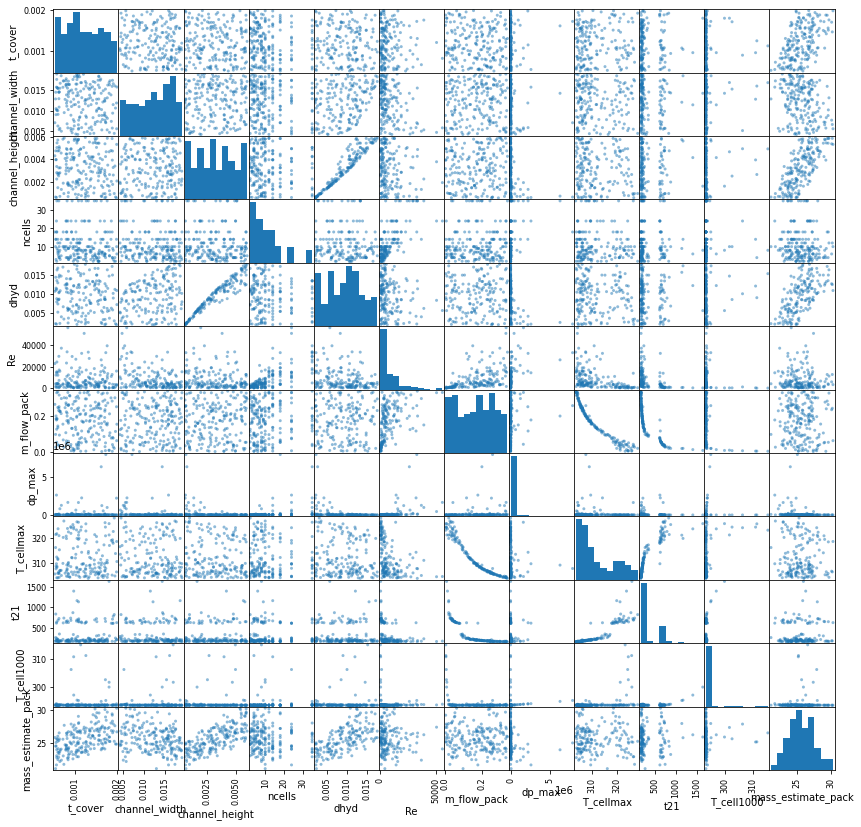

In [45]:
cols_sm = ['t_cover', 'channel_width', 'channel_height', 
           'ncells', 'dhyd', 'Re', 'm_flow_pack', 
           'dp_max', 'T_cellmax', 't21', 
           'T_cell1000', 'mass_estimate_pack'
          ]

pd.plotting.scatter_matrix(dfr.filter(items=cols_sm), figsize=(14,14));